# Explore here

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error

In [2]:
# mostrar archivos guardados.
df = pd.read_csv("../data/raw/AB_NYC_2019.csv")
# Con esto nos aseguramos de que todas las columnas sean visibles en la salida.
pd.set_option('display.max_columns', None)
#primeras filas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# aqui podemos ver que columnas son numericas,categoricas y cuantos valores faltan.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
# aqui vemos media, derivacion standar y percentiles.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [5]:
# Busco columnas que tienen un solo valor en todas las filas y las eliminamos.
print("Columnas antes de eliminar constantes:", df.columns)
n_unicos = df.nunique()
df.drop(columns=n_unicos[n_unicos == 1].index, inplace=True)
print("Columnas después de eliminar constantes:", df.columns)
# Número de valores distintos en cada colummna
for col in df.columns:
    print(f"Columna: {col}, Valores únicos: {df[col].nunique()}") 

Columnas antes de eliminar constantes: Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
Columnas después de eliminar constantes: Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
Columna: id, Valores únicos: 48895
Columna: name, Valores únicos: 47905
Columna: host_id, Valores únicos: 37457
Columna: host_name, Valores únicos: 11452
Columna: neighbourhood_group, Valores únicos: 5
Columna: neighbourhood, Valores únicos: 221
Columna: latitude, Valores únicos: 19048
Columna: 

In [6]:
# Eliminamos registros duplicados para evitar que datos repetidos afecten el análisis.
print(f"Filas antes de eliminar duplicados: {df.shape[0]}")
df.drop_duplicates(inplace=True)
print(f"Filas después de eliminar duplicados: {df.shape[0]}")

Filas antes de eliminar duplicados: 48895
Filas después de eliminar duplicados: 48895


id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64


<Axes: >

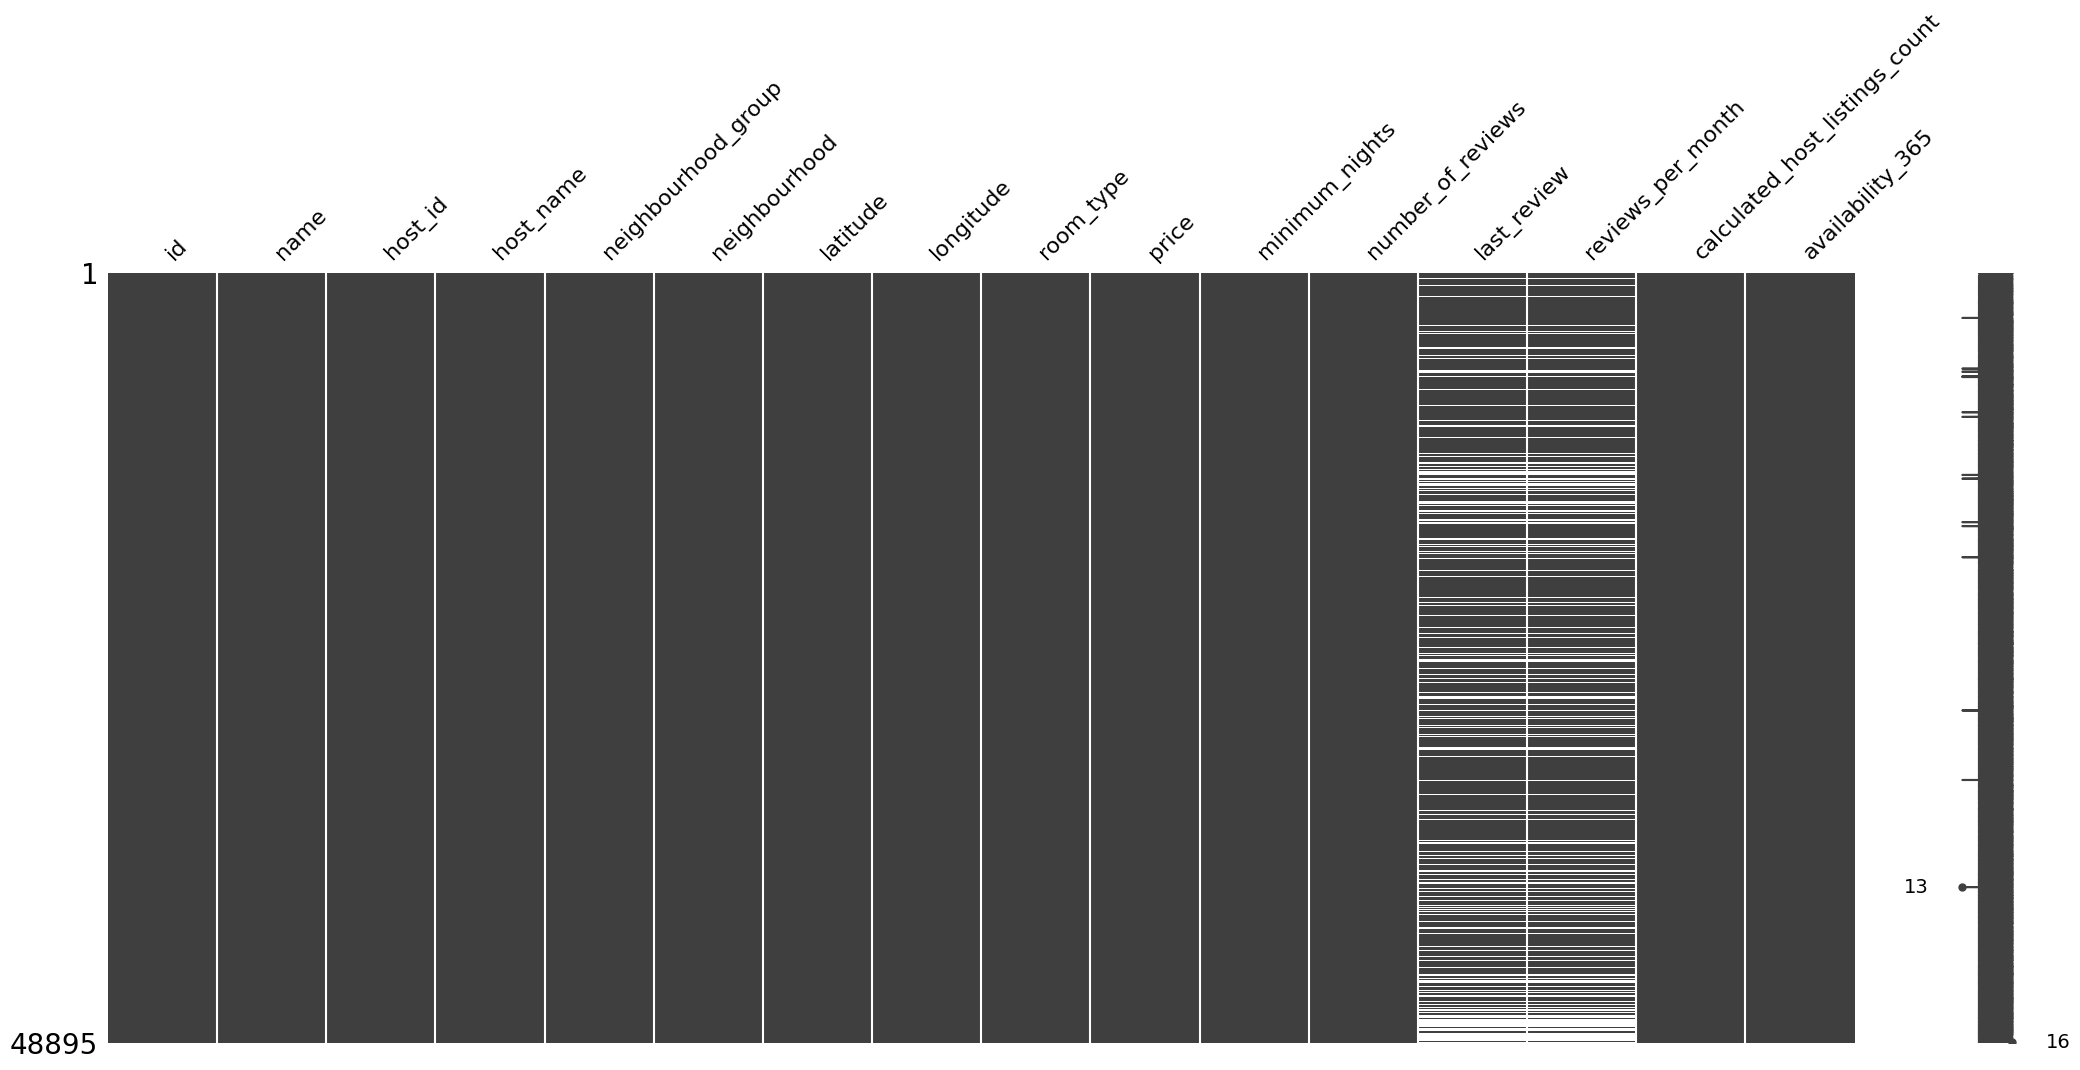

In [7]:
# Calculamos el porcentaje de valores faltantes por columna
print(df.isnull().mean() * 100)
msno.matrix(df)

In [8]:
# Eliminamos columnas con más del 90% de valores faltantes
threshold = 0.90  
cols_to_drop = df.isnull().mean()[df.isnull().mean() > threshold].index
df.drop(columns=cols_to_drop, inplace=True)
print(f"\nColumnas eliminadas por exceso de valores faltantes: {cols_to_drop}")
print(df.isnull().sum())


Columnas eliminadas por exceso de valores faltantes: Index([], dtype='object')
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [9]:
# Imputamos valores faltantes
imputador_knn = KNNImputer(n_neighbors=3) # llenamos los valores faltantes con la media de los 3 vecinos mas cercanos.
df_imputed = pd.DataFrame(imputador_knn.fit_transform(df.select_dtypes(include=[np.number])), columns=df.select_dtypes(include=[np.number]).columns)
# Solo imputamos columnas numéricas.
df_imputed.isnull().sum()

id                                0
host_id                           0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [10]:
# reducimos la influencia de valores extremos.
df_imputed['LOG_PRICE'] = np.log(df_imputed['price'] + 1)
print(df_imputed[['price', 'LOG_PRICE']].head())

   price  LOG_PRICE
0  149.0   5.010635
1  225.0   5.420535
2  150.0   5.017280
3   89.0   4.499810
4   80.0   4.394449


In [11]:
# train y test.
X = df_imputed.drop(['LOG_PRICE', 'price'], axis=1)
y = df_imputed['LOG_PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
f"X_train: {X_train.shape}, X_test: {X_test.shape}"

'X_train: (39116, 9), X_test: (9779, 9)'

In [12]:
# Eliminacion de valores extremos
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()
cooks_distance = model.get_influence().cooks_distance[0]
idx_influyentes = np.where(cooks_distance > (4 / len(X_train)))[0]
X_train_clean = X_train.loc[~X_train.index.isin(X_train.index[idx_influyentes]), :]
y_train_clean = y_train.loc[~X_train.index.isin(X_train.index[idx_influyentes])]
f"X_train limpio: {X_train_clean.shape}"

'X_train limpio: (37292, 9)'

In [13]:
# analizamos la importancia de cada variable, eliminando las varibles con menos del 1% de importancia
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train_clean, y_train_clean)
df_imp = pd.DataFrame({'Feature': X_train_clean.columns, 'Importancia': xgb_model.feature_importances_ * 100})
df_imp = df_imp[df_imp['Importancia'] >= 1]
X_train_final = X_train_clean[df_imp['Feature']]
X_test_final = X_test[df_imp['Feature']]
f"Características seleccionadas: {df_imp['Feature'].tolist()}"

"Características seleccionadas: ['id', 'host_id', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']"

In [14]:
# Escalardo para normalizar los datos en un rango entre 0 y 1
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_final), columns=X_train_final.columns, index=X_train_final.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_final), columns=X_test_final.columns, index=X_test_final.index)
X_train_scaled.head()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
32645,0.703633,0.032941,0.518555,0.540095,0.00542,0.020258,0.030780,0.000000,0.002740
23615,0.523464,0.297987,0.852589,0.568224,0.00271,0.003683,0.005369,0.000000,0.000000
31183,0.663492,0.004434,0.453851,0.532181,0.00271,0.000000,0.023503,0.003067,0.000000
29260,0.615306,0.015035,0.439678,0.585875,0.00542,0.160221,0.175376,0.000000,0.731507
7275,0.146426,0.100962,0.596880,0.653330,0.01084,0.023941,0.008590,0.000000,0.000000


In [15]:
# Entrenamos una regresion lineal y calculamos el error
modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train_clean)

y_pred_test = modelo.predict(X_test_scaled)
error = mean_squared_error(y_test, y_pred_test)
print(f"\nError del modelo después del escalado: {error}")


Error del modelo después del escalado: 0.41519022633040453


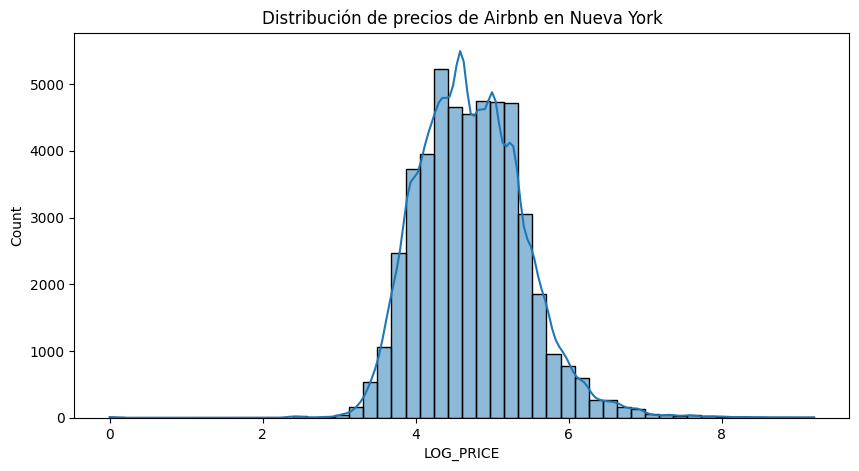

In [16]:
#Grafico de distribución de precios para detectar sesgos en los datos.
plt.figure(figsize=(10, 5))
sns.histplot(df_imputed['LOG_PRICE'], bins=50, kde=True)
plt.title("Distribución de precios de Airbnb en Nueva York")
plt.show()

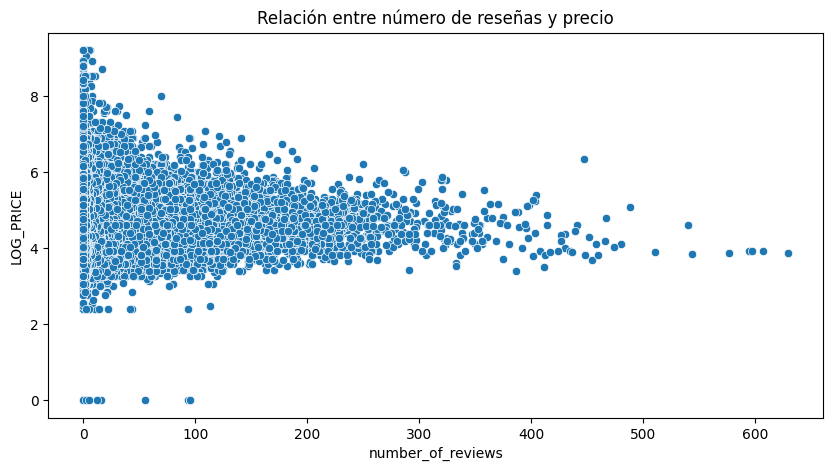

In [17]:
# Se puede ver la relación entre el numero de reseñas y el precio en escala logarítmica
# Cada punto representa una propiedad de Airbnb.
# precios relacionados con la cantidad de reseñas.
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_imputed['number_of_reviews'], y=df_imputed['LOG_PRICE'])
plt.title("Relación entre número de reseñas y precio")
plt.show()

El numero de reseñas (number_of_reviews) no tiene una fuerte correlacion con el precio, los alojamientos no se vuelven más caros si reciben más reseñas

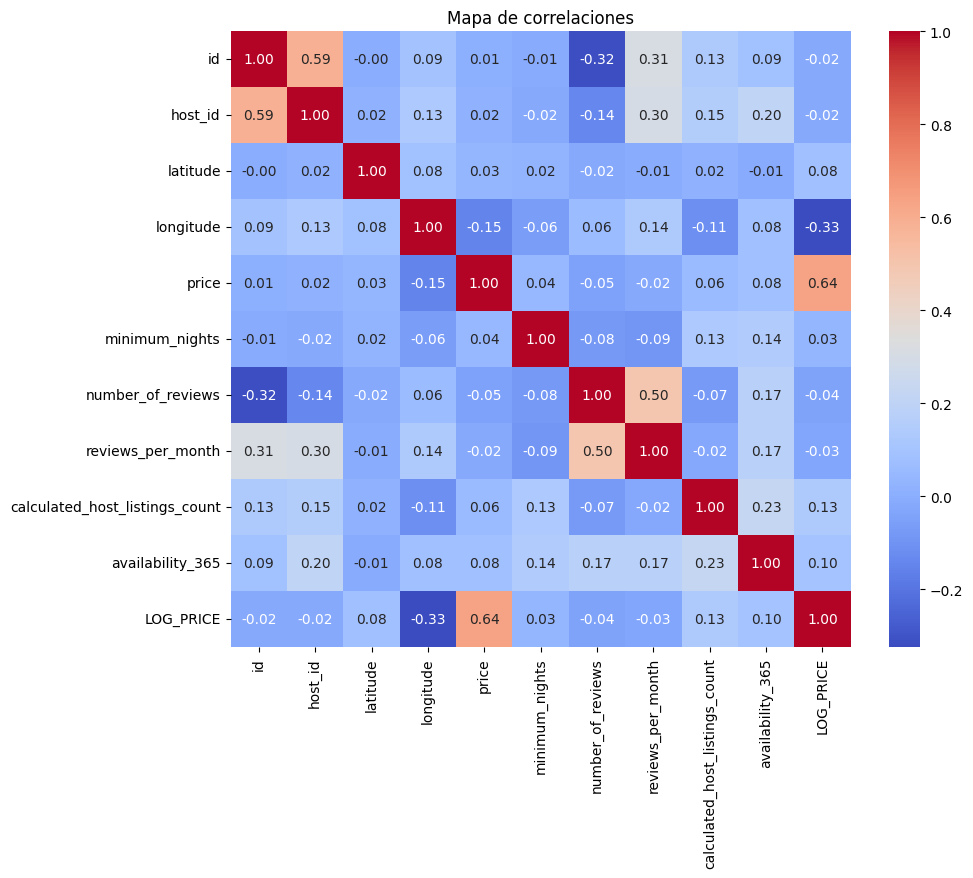

In [18]:
# Identificamos que factores tienen una mayor influencia en el precio y si hay datos redundantes.
plt.figure(figsize=(10, 8))
sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de correlaciones")
plt.show()

El mapa de calor de correlacion identifico variables con alta influencia sobre el precio.
Eliminamos aquillas altamente correlacionadas entre si para evitar redundancia en el modelo

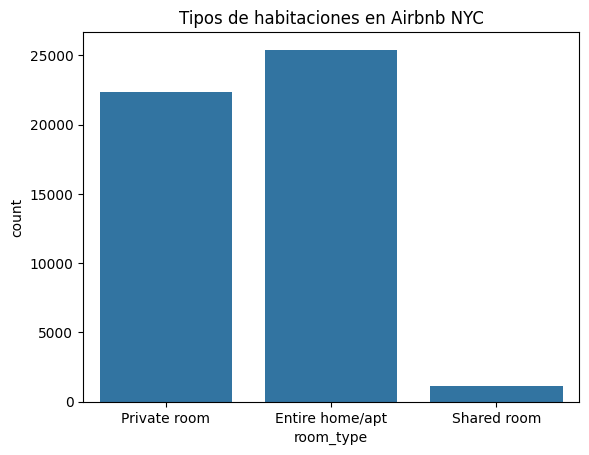

In [19]:
# tipos de habitaciones
sns.countplot(x=df['room_type'])
plt.title("Tipos de habitaciones en Airbnb NYC")
plt.show()

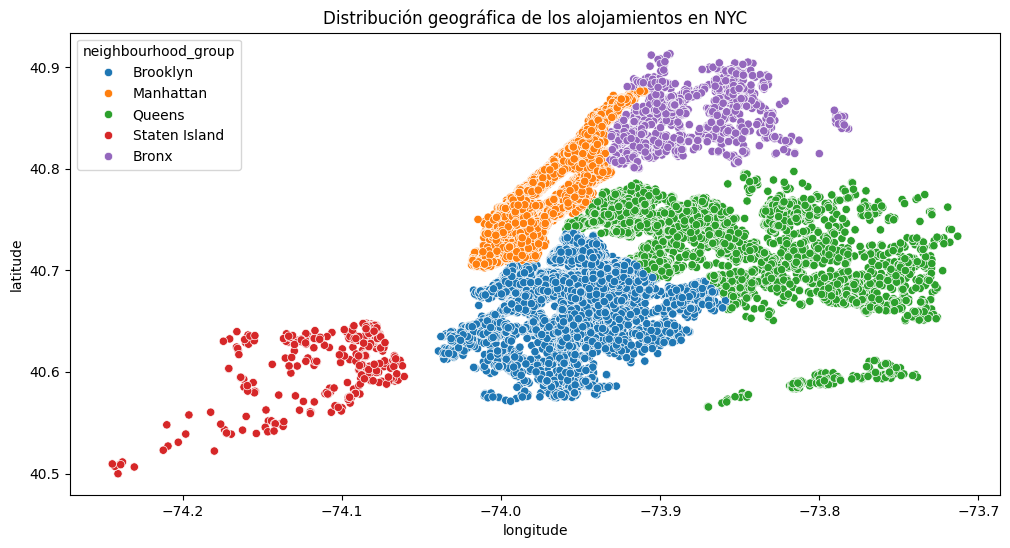

In [20]:
# Análisis de ubicaciones
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['longitude'], y=df['latitude'], hue=df['neighbourhood_group'])
plt.title("Distribución geográfica de los alojamientos en NYC")
plt.show()